# Reto 3

## Miguel Ortiz y Andrea Castiella


In [1]:
import numpy  as np
import pandas as pd
import OurUtils as our
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read data
X_full = pd.read_csv('Reto 3-Dataset/reto3_trainX.csv', header=0, low_memory=False)
Y_full = pd.read_csv('Reto 3-Dataset/reto3_trainY.csv', header=0, low_memory=False)

print(X_full.head())
print(Y_full.head())

   altitud  azimut  inclinacion  DH_agua  DV_agua  DH_camino  sombra_9am  \
0     3351     354           19      450       95       1064         185   
1     2995      84            7      481       30       5154         231   
2     2884      72           25      210      -45        466         239   
3     3139      76           11      301       58       1368         234   
4     3018     312           17       30       10       1719         172   

   sombra_12pm  sombra_3pm  DH_fuego  ...  t31  t32  t33  t34  t35  t36  t37  \
0          203         153       711  ...    0    0    0    0    0    0    0   
1          227         129      5488  ...    0    0    0    0    0    0    0   
2          183          60      2123  ...    0    0    0    0    0    0    0   
3          220         117      3282  ...    0    0    1    0    0    0    0   
4          225         193      1961  ...    0    0    0    0    0    0    0   

   t38  t39  t40  
0    0    1    0  
1    0    0    0  
2    

## Split data into train and validation. 
Train split: 80%

Validation split: 20%

In [3]:
# Split into train and validation
valid_size = 0.2
seed = 1234
X_train, Y_train, X_valid, Y_valid = \
   our.single_stratified_split(X_full, Y_full, test_size=valid_size, random_state=seed)


## Imbalanced class problem
One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.
Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset. [https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/]

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(random_state=seed, sampling_strategy={3:10000 , 4:10000 , 5: 10000, 6:10000 , 7:10000})
X_train, Y_train = over.fit_resample(X_train, Y_train)

under = RandomUnderSampler(random_state=seed, sampling_strategy={1:10000 , 2:10000})
X_train, Y_train = over.fit_resample(X_train, Y_train)

In [12]:
# X_train = X_train.iloc[:,[23, 0, 13, 5, 25, 35, 51]]
# X_valid = X_valid.iloc[:,[23, 0, 13, 5, 25, 35, 51]]


## Scale and transform features

In [5]:
## train
X, Y, scaler, pca, transformer = our.our_scale_transform_features(X_train,Y_train)
print("t ", transformer)

## val
X_pred, Y_true, scaler, _, transformer = our.our_scale_transform_features(X_valid,Y_valid, scaler=scaler, transform=transformer)
print("t ", transformer)

aaaa
aaaa
t  FunctionTransformer(func=<ufunc 'log1p'>, validate=True)
aaaa
t  FunctionTransformer(func=<ufunc 'log1p'>, validate=True)


## Random forest: estimators
[Reference](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d)

accuracy :  0.787960931113119
roc_auc  0.8494942385356598
cohen accuracy:  0.6642113165150745


accuracy :  0.7996213588055592
roc_auc  0.9247822481775465
cohen accuracy:  0.679825379667011


accuracy :  0.8544382771825653
roc_auc  0.9617583996396419
cohen accuracy:  0.7672782836039196


accuracy :  0.884514435695538
roc_auc  0.978772405532154
cohen accuracy:  0.8145212406120935


accuracy :  0.8984122886278559
roc_auc  0.986331604578515
cohen accuracy:  0.8368510685735979


accuracy :  0.9062432769674282
roc_auc  0.99004076824193
cohen accuracy:  0.8492411559737991


accuracy :  0.9113635385740717
roc_auc  0.991514890939062
cohen accuracy:  0.8573723180293031


accuracy :  0.9105460178133471
roc_auc  0.9922957385823882
cohen accuracy:  0.8560661689007184


accuracy :  0.9119659222925003
roc_auc  0.9924930442939485
cohen accuracy:  0.8584370843498477




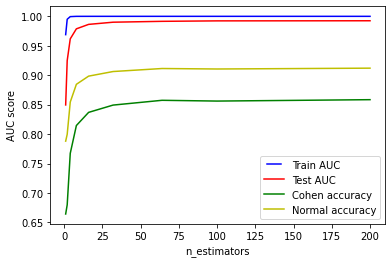

In [11]:
# Multiclass
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, cohen_kappa_score
import matplotlib.pyplot as plt

max_leaf_nodes = 16

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
cohen_list = []
rf_list = []
accuracy_list = []
print("=================")
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X, Y)
   rf_list.append(rf)
   train_pred = rf.predict_proba(X)
   roc_auc = roc_auc_score(Y, train_pred, multi_class='ovr')
   train_results.append(roc_auc)
   y_pred = rf.predict_proba(X_pred)
   y_pred_label = rf.predict(X_pred)
   roc_auc = roc_auc_score(Y_true, y_pred, multi_class='ovr')
   accuracy = accuracy_score(Y_true,y_pred_label)
   cohen = cohen_kappa_score(Y_true, y_pred_label)
   cohen_list.append(cohen)
   accuracy_list.append(accuracy)
   print("accuracy : ", accuracy)
   print("roc_auc ", roc_auc)
   print("cohen accuracy: ", cohen)
   print("=================\n\n")
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
line3, = plt.plot(n_estimators, cohen_list, 'g', label="Cohen accuracy")
line4, = plt.plot(n_estimators, accuracy_list, 'y', label="Normal accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()



## Random forest: depths

accuracy :  0.4876726474764425
roc_auc  0.8251040801666178
accuracy :  0.5159846822425885
roc_auc  0.8779252717423096
accuracy :  0.5675315175766964
roc_auc  0.9054333722724245
accuracy :  0.6379243578159287
roc_auc  0.9177325835317028
accuracy :  0.6978185103911192
roc_auc  0.9257017933627997
accuracy :  0.7084893076889979
roc_auc  0.9320260828444802
accuracy :  0.7307775052708575
roc_auc  0.9394713448478681
accuracy :  0.7434705907663182
roc_auc  0.9464162425051554
accuracy :  0.7584011015016565
roc_auc  0.9503016936916706
accuracy :  0.7682543780388107
roc_auc  0.9563264040374443
accuracy :  0.7830127791403124
roc_auc  0.960968359411279
accuracy :  0.7937696312551095
roc_auc  0.965255053676101
accuracy :  0.8101630738780603
roc_auc  0.970271446823232
accuracy :  0.823329460866572
roc_auc  0.9734767313203082
accuracy :  0.8367540123058388
roc_auc  0.9771920375365625
accuracy :  0.8467793984768297
roc_auc  0.9799065003812873
accuracy :  0.8536207564218408
roc_auc  0.9814101864409234
a

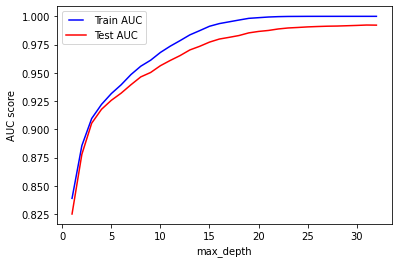

In [19]:
# Multiclass
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X, Y)
   train_pred = rf.predict_proba(X)
   roc_auc = roc_auc_score(Y, train_pred, multi_class='ovr')
   train_results.append(roc_auc)
   y_pred = rf.predict_proba(X_pred)
   y_pred_label = rf.predict(X_pred)
   roc_auc = roc_auc_score(Y_true, y_pred, multi_class='ovr')
   accuracy = accuracy_score(Y_true,y_pred_label)
   print("accuracy : ", accuracy)
   print("roc_auc ", roc_auc)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max_depth")
plt.show()


## Select Random forest model

In [7]:
rf = rf_list[5] # n_estimators: 32

## Competition data

In [8]:
# Load competition data
challenge_data = pd.read_csv('Reto 3-Dataset/reto3_testX.csv', header=0)
challenge_data = scaler.transform(challenge_data)
challenge_data = transformer.fit_transform(challenge_data)

# Inference
Y_chal = rf.predict(challenge_data)

t  FunctionTransformer(func=<ufunc 'log1p'>, validate=True)


## Save results

In [9]:
np.savetxt('reto3_Ypred.csv', Y_chal, fmt='%i', delimiter=',')